In [ ]:
!pip install lime
!pip install seaborn
!pip install pandas
!pip install scikit-survival

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              4743 non-null   object
 1   age              4743 non-null   int64 
 2   race             4743 non-null   object
 3   juv_fel_count    4743 non-null   int64 
 4   decile_score     4743 non-null   int64 
 5   juv_misd_count   4743 non-null   int64 
 6   juv_other_count  4743 non-null   int64 
 7   priors_count     4743 non-null   int64 
 8   c_charge_degree  4743 non-null   object
 9   decile_score.1   4743 non-null   int64 
 10  v_decile_score   4743 non-null   int64 
 11  priors_count.1   4743 non-null   int64 
 12  two_year_recid   4743 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 481.8+ KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to b

Logisitic regression classifier accuracy:  83.46 prediction:  [0] Predict probability:  [[0.79864532 0.20135468]]
prisoner information:
 [1 34 1 0 7 0 0 3 0 7 6 3] 0
Linear: 

Intercept 0.18085136202771585
Prediction_local [0.17831118]
Right: 0.2013546847540707


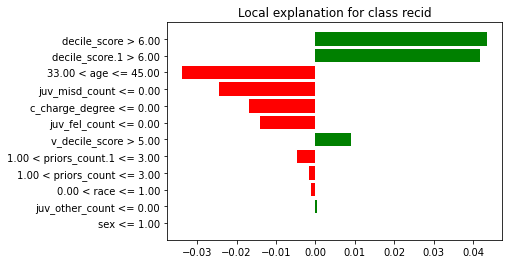

In [ ]:
from __future__ import print_function
import lime
import lime.lime_tabular
import sklearn.ensemble
import sklearn.metrics
from lime import lime_text
from lime.lime_text import LimeTextExplainer
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
import sklearn.feature_extraction 
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import pickle


compas = pd.read_csv("/content/compas-scores-two-years-violent.csv")
#compas = pd.read_csv("C:/Users/Chick/PycharmProjects/thesis research/compas.csv")
compasfeat = compas.drop([ 'id', 'name', 'first', 'last', 'compas_screening_date',
                          'dob', 'age_cat',  'days_b_screening_arrest', 'c_jail_in','c_jail_out','c_case_number',
                          'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
                          'c_charge_desc', 'is_recid', 'r_case_number','r_charge_degree','r_days_from_arrest', 'r_offense_date',
                          'r_charge_desc', 'r_jail_in','r_jail_out','violent_recid','is_violent_recid', 'vr_case_number','vr_charge_degree', 'vr_offense_date', 'vr_charge_desc','type_of_assessment',
                          'score_text', 'screening_date', 'v_type_of_assessment', 'v_score_text',
                          'v_screening_date', 'in_custody', 'out_custody','start', 'end', 'event',
                          'two_year_recid.1'], axis=1)
print(compasfeat.info())
le = preprocessing.LabelEncoder()
compasfeat.race[compasfeat.race == 'African-American'] = 1
compasfeat.race[compasfeat.race == 'Caucasian'] = 0
compasfeat.race[compasfeat.race == 'Hispanic'] = 2
compasfeat.race[compasfeat.race == 'Asian'] = 3
compasfeat.race[compasfeat.race == 'Other'] = 4
compasfeat.race[compasfeat.race == 'Native American'] = 5
compasfeat['sex'] = le.fit_transform(compasfeat['sex'].values)
compasfeat['c_charge_degree'] = le.fit_transform(compasfeat['c_charge_degree'].values)

predict = "two_year_recid"

#test figure for displaying in the model
i= 66
###############################################################three models on the first dataset################################################################
x = np.array(compasfeat.drop([predict], 1))
y = np.array(compasfeat[predict])


for _ in range(35):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=.20)

    #build the model
    linear = linear_model.LogisticRegression(random_state=1, solver='sag')
    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
  
  
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, mode='classification', feature_names = compasfeat.columns.values, class_names=['no recid', 'recid'], verbose=True, discretize_continuous=True, discretizer='quartile')

print("Logisitic regression classifier accuracy: ",round(acc*100, 2), "prediction: ", linear.predict(x_test[i].reshape(1, -1)), "Predict probability: ", linear.predict_proba(x_test[i].reshape(1, -1)))


print("prisoner information:\n", x_test[i],y_test[i])
print("Linear: \n")

exp = explainer.explain_instance(x_test[i], linear.predict_proba, num_features=len(compasfeat.columns))
img = exp.as_pyplot_figure()
img.savefig('Linear1-1.svg', format='svg',bbox_inches='tight')
img.savefig('Linear1-1.pdf', format='pdf',bbox_inches='tight')
plt.show()
